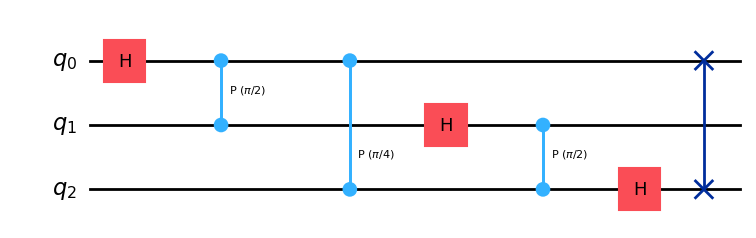

In [1]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.circuit.library import SwapGate
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

pi = np.pi

def qft(state, n):
    qc = QuantumCircuit(n)
    for i, s  in enumerate(state):
        if s == '1':
            qc.x(i)
    for i in range(n):
        qc.h(i) # apply hadamard gate
        # first fix how many times the contolled phase gate should be applied on each qubit
        iterations =range((n-1) -i)
        for j in iterations:
            # the angle is always fixed for every iterations. rotations with k = 2^2, 2^3
            rotation = 2*pi / (2** (j+2))
            # the control qubit is always the (j`+i)th qubit for kth iterations for each i qubit, j` = j+1
            control = (j+1) + i
            qc.cp(rotation, control, i)
            # j+=1
    for k in range(n//2):
        qc.swap(k, n-1 - k)
    return qc
n = int(input('Number of qubits: '))
initial_state = input(f'initial state for the {n} qubit sys: ')

qc = qft(initial_state, n)
qc.draw('mpl')


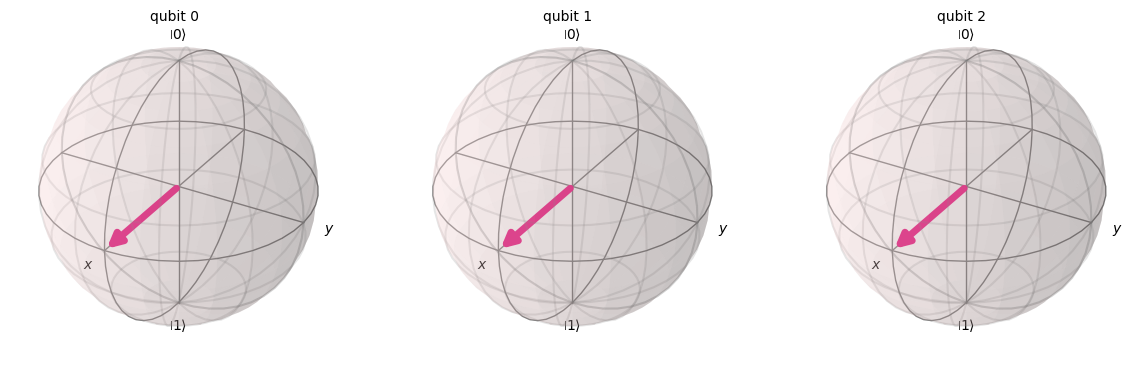

In [2]:
state = Statevector(qc)
plot_bloch_multivector(state)